In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df_ori=pd.read_csv('dataset/flight_dataset.csv')
df_ori.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [3]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


# Data Wrangling : Standardized Data

In [4]:
df_ori['ExactDate'] = pd.to_datetime(df_ori[['Year', 'Month', 'Date']].rename(columns={'Date': 'day'}))
df_ori['Total_Duration'] = (df_ori['Duration_hours'] + df_ori['Duration_min'] / 60).round(2)

def categorize_time(hour):
    if 0 <= hour < 4:
        return 'Midnight'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Create a new column
df_ori['Dep_time'] = df_ori['Dep_hours'].apply(categorize_time)
df_ori['Arrival_time'] = df_ori['Arrival_hours'].apply(categorize_time)
df_ori.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,ExactDate,Total_Duration,Dep_time,Arrival_time
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,2019-03-24,2.83,Night,Midnight
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,2019-05-01,7.42,Early Morning,Afternoon
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,2019-06-09,19.00,Morning,Early Morning
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,2019-05-12,5.42,Evening,Night
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,2019-03-01,4.75,Evening,Night


In [5]:
df = df_ori.drop(columns=['Date','Month','Year','Dep_hours','Dep_min','Arrival_hours','Arrival_min','Duration_hours','Duration_min'])
df['Destination'] = df['Destination'].replace('New Delhi','Delhi')
df['Total_Stops'] = df['Total_Stops'].astype(str)
df = df.sort_values(by=['Total_Stops'], ascending=[True])
df = df.reset_index(drop=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,ExactDate,Total_Duration,Dep_time,Arrival_time
0,IndiGo,Banglore,Delhi,0,3897,2019-03-24,2.83,Night,Midnight
1,IndiGo,Banglore,Delhi,0,4284,2019-05-06,2.75,Midnight,Early Morning
2,SpiceJet,Chennai,Kolkata,0,3543,2019-05-03,2.33,Evening,Night
3,Air India,Chennai,Kolkata,0,4667,2019-06-01,2.25,Morning,Afternoon
4,IndiGo,Kolkata,Banglore,0,4804,2019-06-12,2.58,Early Morning,Early Morning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Airline         10683 non-null  object        
 1   Source          10683 non-null  object        
 2   Destination     10683 non-null  object        
 3   Total_Stops     10683 non-null  object        
 4   Price           10683 non-null  int64         
 5   ExactDate       10683 non-null  datetime64[ns]
 6   Total_Duration  10683 non-null  float64       
 7   Dep_time        10683 non-null  object        
 8   Arrival_time    10683 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 751.3+ KB


## Exploratory Data Analysis (EDA)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'SpiceJet'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'GoAir'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'Multiple carriers'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Jet Airways Business'),
  Text(11, 0, 'Trujet')])

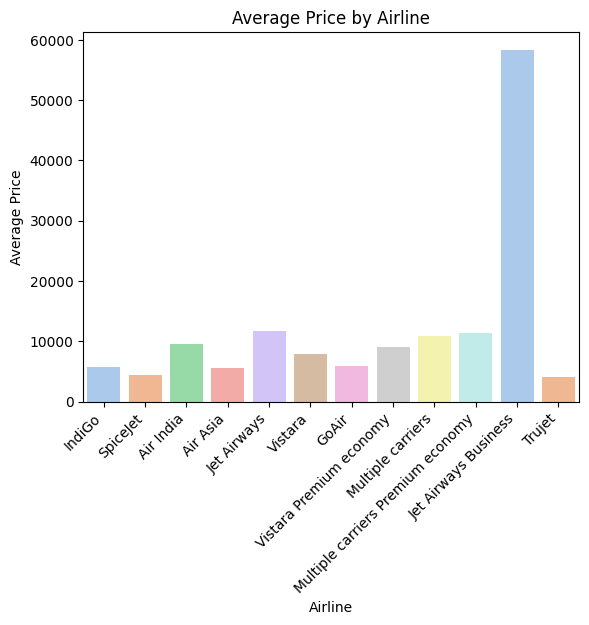

In [7]:
sns.barplot(x='Airline', y='Price', data=df, hue='Airline', estimator=np.mean, palette='pastel', errorbar=None)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

We will remove 'Jet Airways Business' from the Airlines as the price level for Business Class is different from economy class. The difference of price level may potentially to be outliers.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'SpiceJet'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'GoAir'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'Multiple carriers'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

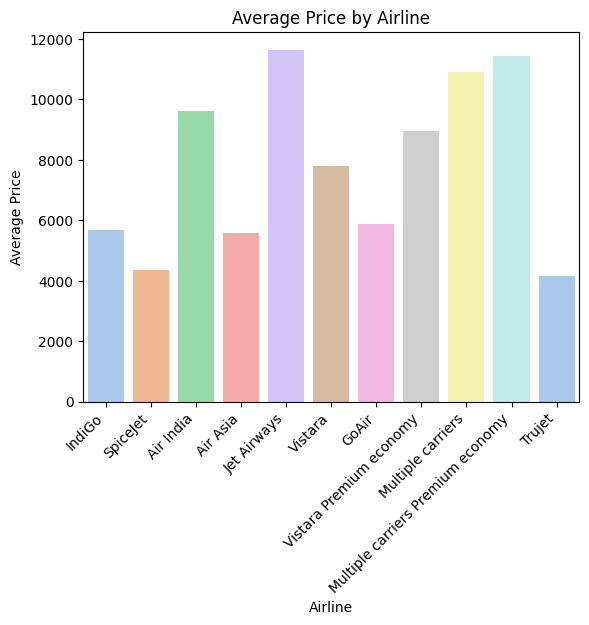

In [8]:
df = df[df['Airline'] != 'Jet Airways Business']

sns.barplot(x='Airline', y='Price', data=df, hue='Airline', estimator=np.mean, palette='pastel', errorbar=None)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

In [9]:
df_corr = df.copy()

# Convert Category Variable to Numeric Code
df_corr['Airline'] = df_corr['Airline'].astype('category').cat.codes
df_corr['Source'] = df_corr['Source'].astype('category').cat.codes
df_corr['Destination'] = df_corr['Destination'].astype('category').cat.codes
df_corr['Total_Stops'] = df_corr['Total_Stops'].astype('category').cat.codes
df_corr['Dep_time'] = df_corr['Dep_time'].astype('category').cat.codes
df_corr['Arrival_time'] = df_corr['Arrival_time'].astype('category').cat.codes
df_corr['ExactDate'] = df_corr['ExactDate'].astype('category').cat.codes

<h2>Boxplot</h2> Perform boxplot distribution for each features to determined outliers.

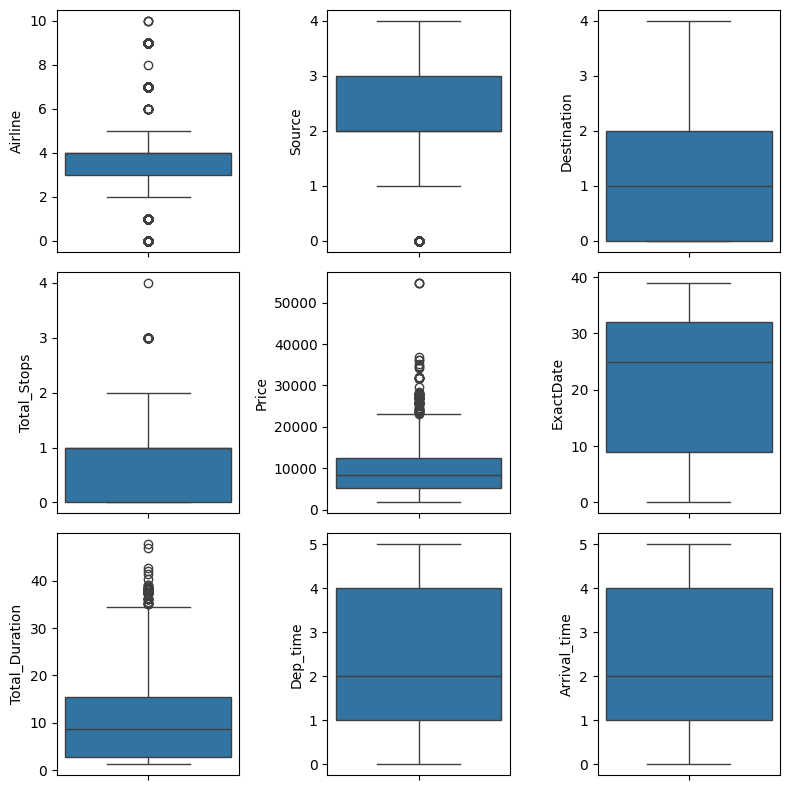

In [10]:
plt.figure(figsize = (8, 8))
for i, col in enumerate(df_corr.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_corr[col])
    plt.tight_layout()
    plt.plot()

From the boxplot distribution for each features, it seems some of the features have few of outliers.

<h2>Correlation</h2> Discover the correlation for each features with Price (Target Variable).

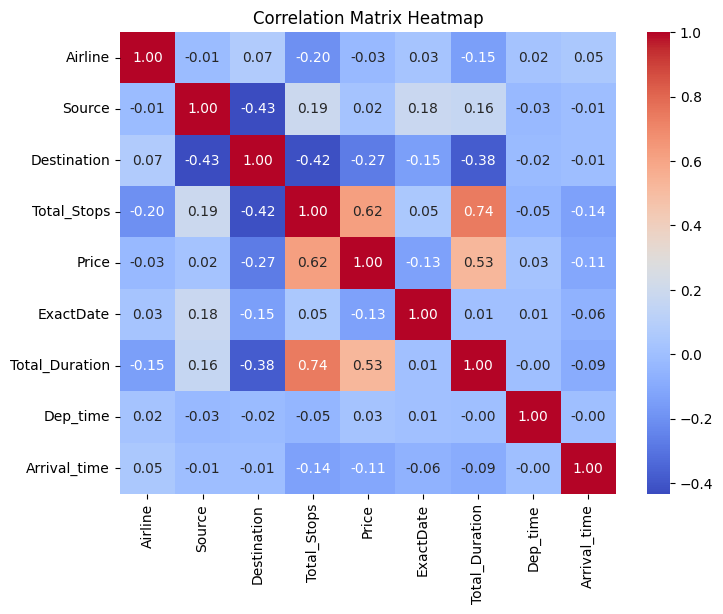

In [11]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

From the correlation heatmap, we can see that 'Total Stops' and 'Total Duration' has stronger correlation with the 'Price' (Target Variable). 

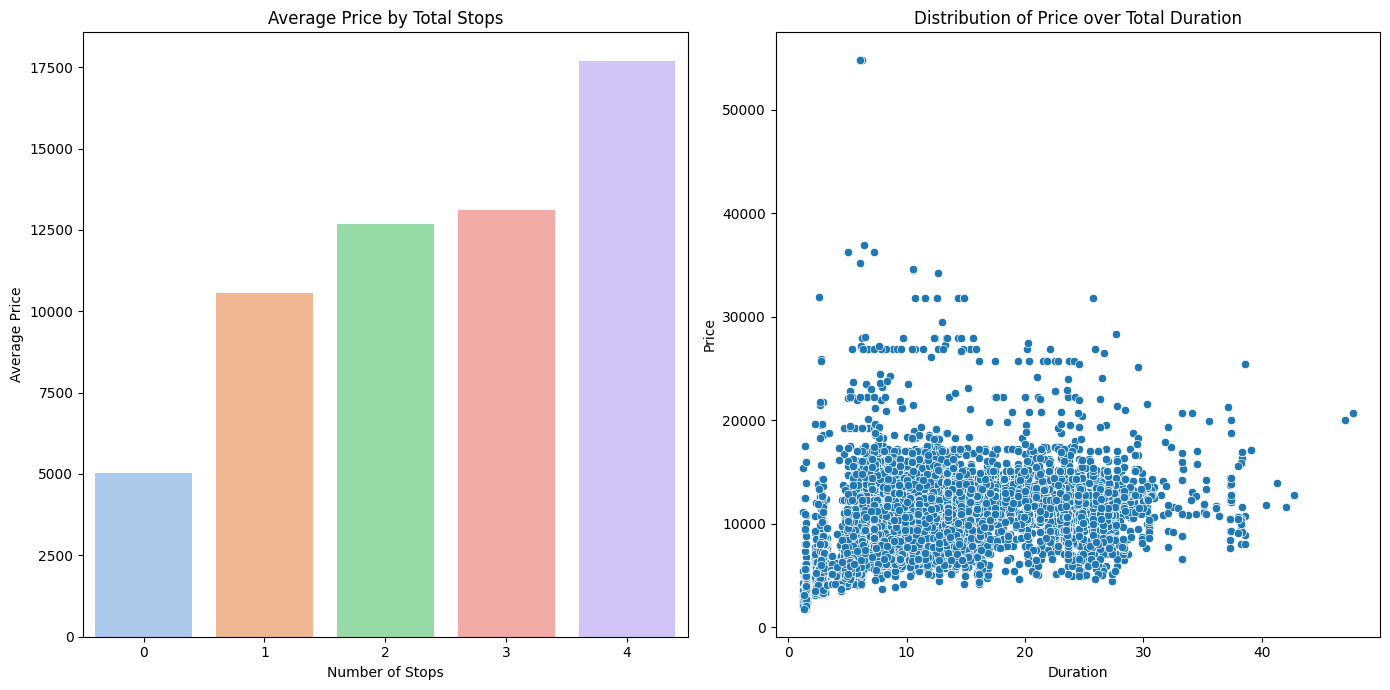

In [12]:
fig,(ax_1, ax_2) = plt.subplots(1, 2, figsize=(14, 7))

# 1st subplot: Average Price by Total Stops
sns.barplot(x='Total_Stops', y='Price', hue='Total_Stops', data=df, estimator=np.mean, palette='pastel', errorbar=None, ax=ax_1)
ax_1.set_title('Average Price by Total Stops')
ax_1.set_xlabel('Number of Stops')
ax_1.set_ylabel('Average Price')

# 2nd subplot: Price by Total Duration
sns.scatterplot(data=df, x="Total_Duration", y="Price")
ax_2.set_title('Distribution of Price over Total Duration')
ax_2.set_xlabel('Duration')
ax_2.set_ylabel('Price')

plt.tight_layout()
plt.show()

From the barplot, we may observed that the more the number of stops, the higher the average price for the flights.
Whereas from the scatter plot, although there's some outliers but it can be seen that the strong correlation between it (duration/price).

Let's observe the other features that have lesser correlation with the price (target variable).

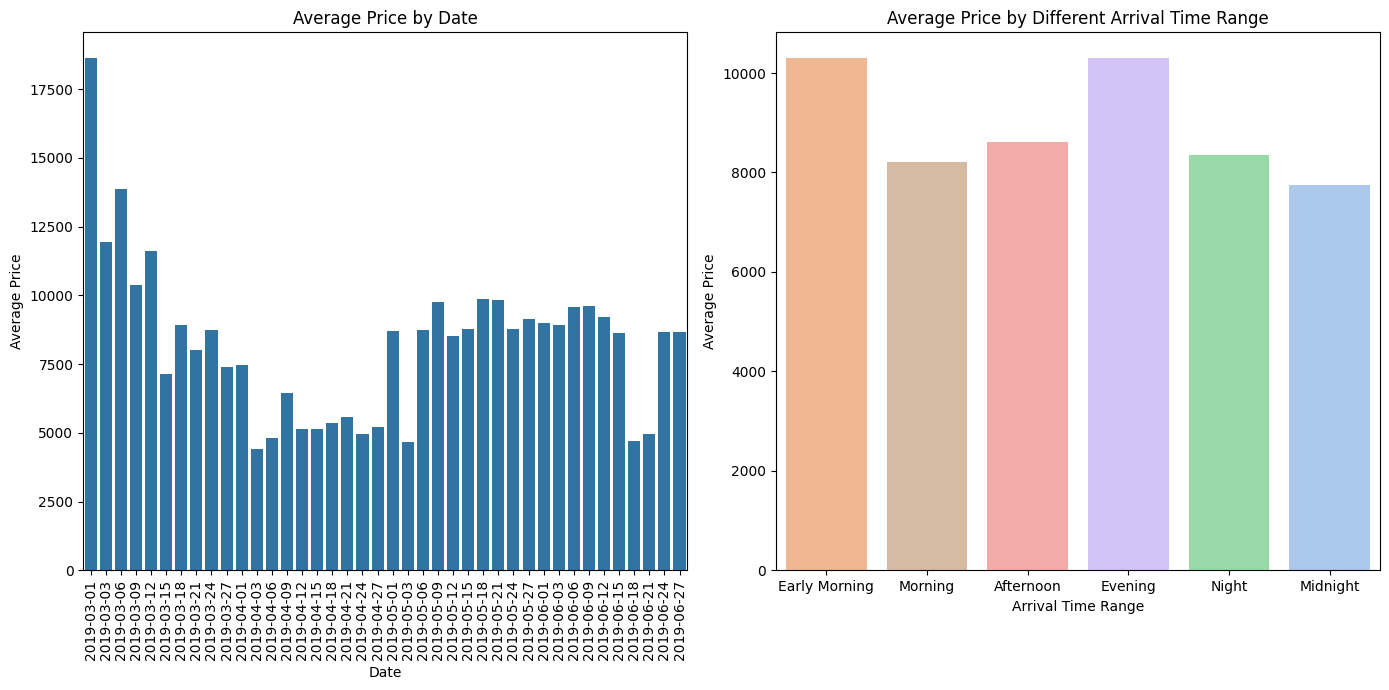

In [30]:
fig,(ax_3,ax_4) = plt.subplots(1, 2, figsize=(14, 7))

# 3rd subplot: Average Price by Date

df_date=df.sort_values(by='ExactDate', ascending=True)
sns.barplot(x='ExactDate', y='Price', data=df_date, estimator=np.mean, errorbar=None, ax=ax_3)
ax_3.set_title('Average Price by Date')
ax_3.set_xlabel('Date')
ax_3.set_ylabel('Average Price')
tick_positions = ax_3.get_xticks()
ax_3.set_xticks(tick_positions)
ax_3.set_xticklabels(ax_3.get_xticklabels(),rotation=90)

# 4th subplot: Average Price by Different Arrival Time Range
time_order=['Early Morning','Morning','Afternoon','Evening','Night','Midnight']
sns.barplot(data=df, x="Arrival_time", y="Price", hue = "Arrival_time",palette='pastel', errorbar=None, order=time_order, ax=ax_4)
ax_4.set_title('Average Price by Different Arrival Time Range')
ax_4.set_xlabel('Arrival Time Range')
ax_4.set_ylabel('Average Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Model Development

We will use df_corr to visualize the dataset as the data types has been converted to integer (numeric code).


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

<h2>Function for Plotting</h2>

In [15]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))

    ax4=sns.kdeplot(RedFunction, color="r", label=RedName)
    sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax4)
    plt.title(Title)
    plt.legend()
    plt.show()
    plt.close()

Before we split the dataset, let's use simple linear regression to look at the distribution of the fitted (predicted) values that result from the model and compare it to the distribution of the actual values.

In [16]:
Z=df_corr.drop(['Price'],axis=1)
Y=df_corr['Price']
lm=LinearRegression()
lm.fit(Z,Y)
print('The R-square is: ', lm.score(Z,Y))
Yhat=lm.predict(Z)
print('The MSE is: ', mean_squared_error(Y, Yhat))

The R-square is:  0.4471190110812745
The MSE is:  10972376.53407383


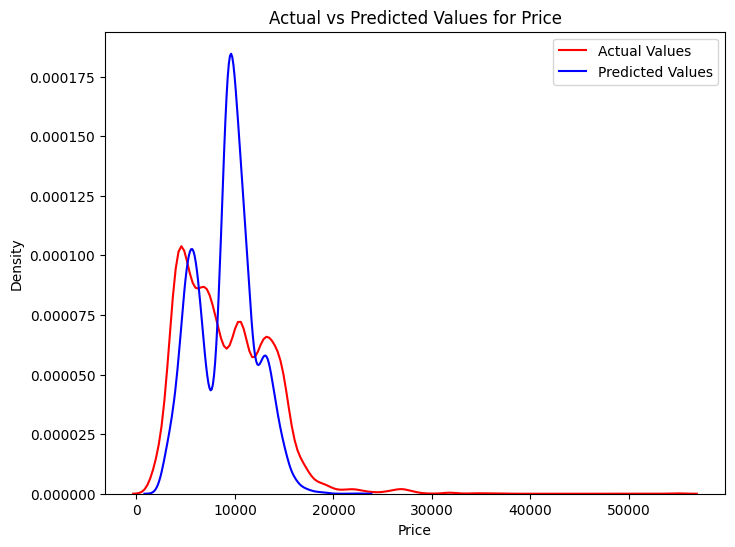

In [17]:
Title = 'Actual vs Predicted Values for Price'
DistributionPlot(Y, Yhat, 'Actual Values', 'Predicted Values', Title)

We can see that the  part of the fitted values are far away to the actual values, means there's some noise (outliers) cause the occurrence of overfitting.

We will use Polynomial Regression by using a pipeline to fit again the model, to improve the score of R-squared.

In [18]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
y_hat=pipe.predict(Z)
print('The R-square is: ',r2_score(Y,y_hat))
print('The MSE is: ',mean_squared_error(Y, y_hat))

The R-square is:  0.5558218650354845
The MSE is:  8815079.271517092


From the R-square score and MSE, it seems that Polynomial Regression model is more suitable to fit the dataset.

## Model Refinement

Split the data into training and testing subsets, assuming that 30% of the data will be reserved for testing.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.3, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3204
number of training samples: 7473


We use Grid Search to find the best hyperparameter (Alpha) for Ridge Regression.

In [20]:
parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
RidgeModel=Ridge()
Grid = GridSearchCV(RidgeModel,parameters1, cv=4)
Grid.fit(Z,Y)
Best_alpha=Grid.best_params_['alpha']

print('The best hyperparameter is:', Best_alpha)

The best hyperparameter is: 100


In [21]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RidgeModel=Ridge(alpha=100)
RidgeModel.fit(x_train_pr,y_train)
y_hat = RidgeModel.predict(x_test_pr)
print('The R-square is: ', r2_score(y_test,y_hat))
print('The MSE is: ',mean_squared_error(y_test, y_hat))

The R-square is:  0.6835525798334754
The MSE is:  5991872.392414791


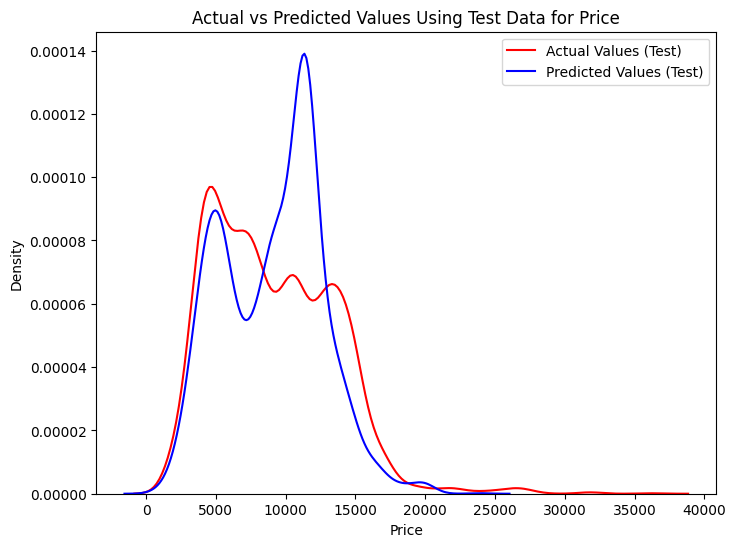

In [22]:
Title = 'Actual vs Predicted Values Using Test Data for Price'
DistributionPlot(y_test, y_hat, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

The R-squared value has increased and the MSE has been reduced after the Ridge Regression approach. 